In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib

In [2]:
df = pd.read_csv('books.csv')

In [3]:
# Verifying types of data in each columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11123 entries, 0 to 11122
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   bookID              11123 non-null  int64  
 1   title               11123 non-null  object 
 2   authors             11123 non-null  object 
 3   average_rating      11123 non-null  float64
 4   isbn                11123 non-null  object 
 5   isbn13              11123 non-null  float64
 6   language_code       11123 non-null  object 
 7   num_pages           11123 non-null  int64  
 8   ratings_count       11123 non-null  int64  
 9   text_reviews_count  11123 non-null  int64  
 10  publication_date    11123 non-null  object 
 11  publisher           11123 non-null  object 
dtypes: float64(2), int64(4), object(6)
memory usage: 1.0+ MB


# Checking the outliers on each numeric category

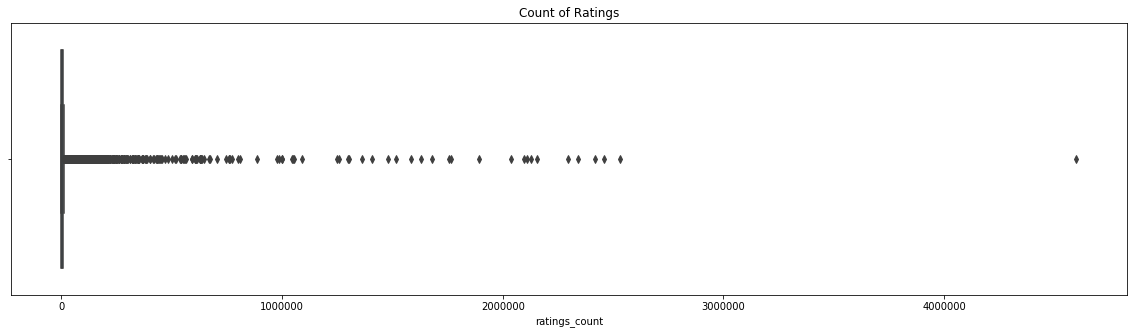

In [4]:
plt.figure(figsize=(20,5))
sns.boxplot(df['ratings_count'])
plt.title('Count of Ratings')
plt.show()

In [5]:
# One book with more than 4M votes
df.loc[df['ratings_count'] > 4000000]

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
10336,41865,Twilight (Twilight #1),Stephenie Meyer,3.59,316015849,9.780000e+12,eng,501,4597666,94265,9/6/2006,Little Brown and Company


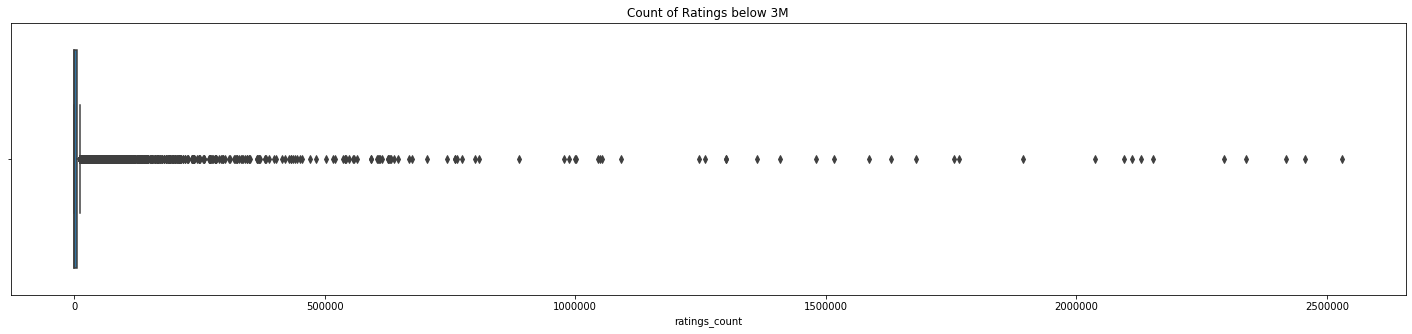

In [6]:
rating_below_3M = df.loc[df['ratings_count'] < 3000000]
plt.figure(figsize=(25,5))
sns.boxplot(rating_below_3M['ratings_count'])
plt.title('Count of Ratings below 3M')
plt.show()

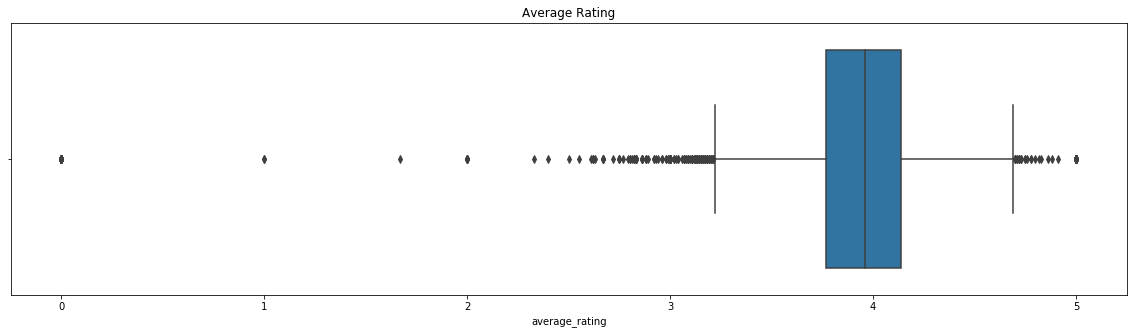

In [7]:
plt.figure(figsize=(20,5))
sns.boxplot(df['average_rating'])
plt.title('Average Rating')
plt.show()

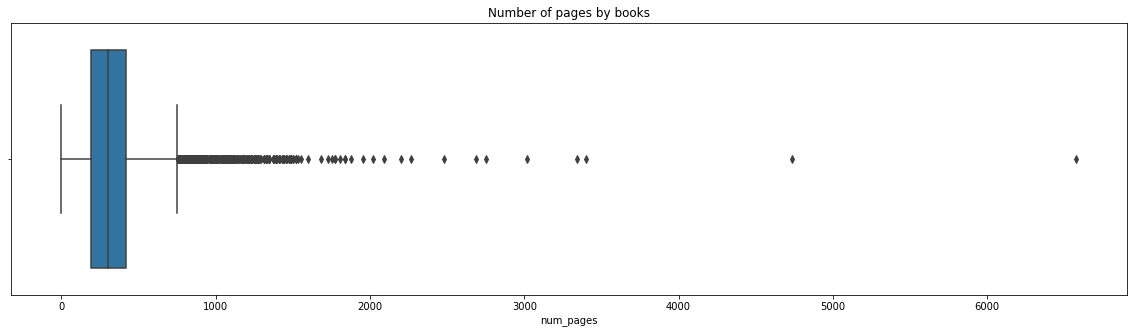

In [8]:
plt.figure(figsize=(20,5))
sns.boxplot(df['num_pages'])
plt.title('Number of pages by books')
plt.show()

In [9]:
# Questions to be answered based on this Dataframe

In [10]:
df.sort_values(by='ratings_count', ascending=False) #Ordering by Ratings_Counts
df.drop(columns=['isbn', 'isbn13']) #Removing columns that are not relevante
df.head()

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,439785960,9.780000e+12,eng,652,2095690,27591,9/16/2006,Scholastic Inc.
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,439358078,9.780000e+12,eng,870,2153167,29221,9/1/2004,Scholastic Inc.
2,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,439554896,9.780000e+12,eng,352,6333,244,11/1/2003,Scholastic
3,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,043965548X,9.780000e+12,eng,435,2339585,36325,5/1/2004,Scholastic Inc.
4,8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,439682584,9.780000e+12,eng,2690,41428,164,9/13/2004,Scholastic


# Books with more than 1000 votes

In [11]:
# I'm considering this number to make sure the outliers are removed (books withfew votes but high rating)
rating_over_10k = df['ratings_count'] >= 1000 
df_2 = df.loc[rating_over_10k]
df_2 = df_2.sort_values(by='average_rating',ascending=False)
df_2.drop(columns=['isbn','isbn13'], inplace=True)
df_2.head(10)

,bookID,title,authors,average_rating,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
6587,24812,The Complete Calvin and Hobbes,Bill Watterson,4.82,eng,1456,32213,930,9/6/2005,Andrews McMeel Publishing
4,8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,eng,2690,41428,164,9/13/2004,Scholastic
6589,24814,It's a Magical World (Calvin and Hobbes #11),Bill Watterson,4.76,eng,176,23875,303,9/1/1996,Andrews McMeel Publishing
6,10,Harry Potter Collection (Harry Potter #1-6),J.K. Rowling,4.73,eng,3342,28242,808,9/12/2005,Scholastic
6590,24816,Homicidal Psycho Jungle Cat (Calvin and Hobbes...,Bill Watterson,4.72,eng,176,15365,290,9/6/1994,Andrews McMeel Publishing
6593,24820,Calvin and Hobbes: Sunday Pages 1985-1995: An ...,Bill Watterson,4.71,eng,96,3613,85,9/17/2001,Andrews McMeel Publishing
5614,20749,Study Bible: NIV,Anonymous,4.70,eng,2198,4166,186,10/1/2002,Zondervan Publishing House
6497,24520,The Complete Aubrey/Maturin Novels (5 Volumes),Patrick O'Brian,4.70,eng,6576,1338,81,10/17/2004,W. W. Norton Company
6591,24818,The Days Are Just Packed,Bill Watterson,4.69,eng,176,20308,244,9/1/1993,Andrews McMeel Publishing
1530,5309,The Life and Times of Scrooge McDuck,Don Rosa,4.67,eng,266,2467,149,6/1/2005,Gemstone Publishing


In [12]:
# Best book of each year
# Author with most books publicized

In [13]:
# Top 10 Books with best average rating
df_2.iloc[0:10]

,bookID,title,authors,average_rating,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
6587,24812,The Complete Calvin and Hobbes,Bill Watterson,4.82,eng,1456,32213,930,9/6/2005,Andrews McMeel Publishing
4,8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,eng,2690,41428,164,9/13/2004,Scholastic
6589,24814,It's a Magical World (Calvin and Hobbes #11),Bill Watterson,4.76,eng,176,23875,303,9/1/1996,Andrews McMeel Publishing
6,10,Harry Potter Collection (Harry Potter #1-6),J.K. Rowling,4.73,eng,3342,28242,808,9/12/2005,Scholastic
6590,24816,Homicidal Psycho Jungle Cat (Calvin and Hobbes...,Bill Watterson,4.72,eng,176,15365,290,9/6/1994,Andrews McMeel Publishing
6593,24820,Calvin and Hobbes: Sunday Pages 1985-1995: An ...,Bill Watterson,4.71,eng,96,3613,85,9/17/2001,Andrews McMeel Publishing
5614,20749,Study Bible: NIV,Anonymous,4.70,eng,2198,4166,186,10/1/2002,Zondervan Publishing House
6497,24520,The Complete Aubrey/Maturin Novels (5 Volumes),Patrick O'Brian,4.70,eng,6576,1338,81,10/17/2004,W. W. Norton Company
6591,24818,The Days Are Just Packed,Bill Watterson,4.69,eng,176,20308,244,9/1/1993,Andrews McMeel Publishing
1530,5309,The Life and Times of Scrooge McDuck,Don Rosa,4.67,eng,266,2467,149,6/1/2005,Gemstone Publishing


In [14]:
# Top 10 Most voted books
most_reviewed = df_2.sort_values(by='ratings_count',ascending=False).iloc[0:10]
most_reviewed

,bookID,title,authors,average_rating,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
10336,41865,Twilight (Twilight #1),Stephenie Meyer,3.59,eng,501,4597666,94265,9/6/2006,Little Brown and Company
1697,5907,The Hobbit or There and Back Again,J.R.R. Tolkien,4.27,eng,366,2530894,32871,8/15/2002,Houghton Mifflin
1462,5107,The Catcher in the Rye,J.D. Salinger,3.80,eng,277,2457092,43499,1/30/2001,Back Bay Books
307,960,Angels & Demons (Robert Langdon #1),Dan Brown,3.89,eng,736,2418736,21303,4/1/2006,Pocket Books
3,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,eng,435,2339585,36325,5/1/2004,Scholastic Inc.
4415,15881,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling/Mary GrandPré,4.42,eng,341,2293963,34692,6/2/1999,Arthur A. Levine Books / Scholastic Inc.
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,eng,870,2153167,29221,9/1/2004,Scholastic Inc.
23,34,The Fellowship of the Ring (The Lord of the Ri...,J.R.R. Tolkien,4.36,eng,398,2128944,13670,9/5/2003,Houghton Mifflin Harcourt
2114,7613,Animal Farm,George Orwell/Boris Grabnar/Peter Škerl,3.93,eng,122,2111750,29677,5/6/2003,NAL
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,eng,652,2095690,27591,9/16/2006,Scholastic Inc.


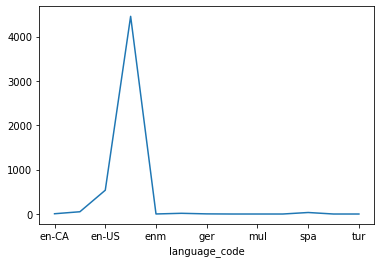

In [15]:
# Books by language
language = df_2.groupby(['language_code'])['language_code'].count()
language.plot()

# Author with most books and best average

In [16]:
# Autor with best average
authors_avg = df.groupby(by='authors', sort=False)['average_rating'].mean().reset_index()
authors_avg.sort_values(by='average_rating',ascending=False)
authors_count = df.groupby(by='authors')['average_rating'].count().reset_index()
authors_count.sort_values(by='average_rating', ascending=False)

authors_count = authors_count.merge(authors_avg, on = 'authors' )
authors_count


,authors,average_rating_x,average_rating_y
0,A.B. Yehoshua/Hillel Halkin,2,3.600
1,A.D.P. Briggs/Leo Tolstoy/Fyodor Dostoyevsky,1,3.760
2,A.E. Cunningham/Harlan Ellison/Charles F. Mill...,1,4.150
3,A.J. Jacobs,1,3.760
4,A.M. Homes,1,3.280
...,...,...,...
6634,Émile Zola/Henri Mitterand,1,4.060
6635,Émile Zola/Robert Lethbridge/Elinor Dorday,1,4.010
6636,Émile Zola/Robin Buss/Brian Nelson,1,3.990
6637,Émile Zola/Roger Pearson,2,4.045


In [27]:
authors_count = authors_count.rename(columns={'average_rating_x':'count', 'average_rating_y':'mean'})
authors_count.sort_values(by='count',ascending=False,inplace=True)
authors_most_books = authors_count.head(10)
authors_most_books

,authors,count,mean
5786,Stephen King,40,3.973500
4747,P.G. Wodehouse,40,4.147250
5470,Rumiko Takahashi,39,4.186667
4711,Orson Scott Card,35,3.779143
46,Agatha Christie,33,3.989091
4987,Piers Anthony,30,3.716667
4305,Mercedes Lackey,29,4.039310
5528,Sandra Brown,29,3.742069
1401,Dick Francis,28,3.962143
2786,James Patterson,23,3.906087


In [45]:
# I`m considering more than two votes to make sures books only voted by author`s mom are not counted

def authors_avg(quantity_of_votes):
    authors_best_avg = authors_count[authors_count['count'] > quantity_of_votes].sort_values(by='mean', ascending=False)
    authors_best_avg.head(20)
    return authors_best_avg

authors_avg(3)

,authors,count,mean
628,Bill Watterson,7,4.708571
2453,Hiromu Arakawa/Akira Watanabe,12,4.565833
2455,Hiromu Arakawa/荒川弘/方郁仁,8,4.556250
2626,J.K. Rowling/Mary GrandPré,6,4.548333
2452,Hiromu Arakawa,5,4.548000
...,...,...,...
1650,Elizabeth Gilbert,6,3.430000
3274,Jonathan Franzen,7,3.420000
5225,Rick Moody,5,3.228000
2399,Herman Melville,6,3.181667
